In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv("./dataset/INFY.csv",index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


In [4]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [6]:
categorical_data=df.select_dtypes(include=['object']).columns

In [7]:
df['Date']=df.index

In [8]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [9]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [10]:
df=df.loc[mask]

In [11]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,INFOSYSTCH,EQ,3442.75,3444.00,3469.70,3427.70,3462.45,3458.35,3448.24,631068,2.176074e+14,NaN,405296.0,0.6422,2011-01-03,0.453126
2011-01-04,INFOSYSTCH,EQ,3458.35,3457.00,3499.00,3457.00,3470.00,3481.45,3481.24,1014911,3.533147e+14,NaN,653567.0,0.6440,2011-01-04,0.667949
2011-01-05,INFOSYSTCH,EQ,3481.45,3465.00,3477.00,3445.10,3463.50,3459.60,3460.24,440395,1.523872e+14,NaN,249899.0,0.5674,2011-01-05,-0.627612
2011-01-06,INFOSYSTCH,EQ,3459.60,3480.00,3493.00,3444.10,3476.95,3478.15,3474.28,586480,2.037595e+14,NaN,298773.0,0.5094,2011-01-06,0.536189
2011-01-07,INFOSYSTCH,EQ,3478.15,3463.35,3495.00,3356.35,3371.10,3370.75,3420.32,1068866,3.655864e+14,NaN,695120.0,0.6503,2011-01-07,-3.087848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,INFY,EQ,1253.05,1249.90,1249.90,1226.00,1237.35,1236.05,1236.34,7313885,9.042416e+14,172066.0,2637421.0,0.3606,2020-12-24,-1.356690
2020-12-28,INFY,EQ,1236.05,1238.45,1248.00,1236.00,1239.45,1240.30,1240.58,4607051,5.715406e+14,123013.0,2098658.0,0.4555,2020-12-28,0.343837
2020-12-29,INFY,EQ,1240.30,1235.00,1254.45,1235.00,1249.85,1250.30,1246.33,6878105,8.572420e+14,132402.0,3219736.0,0.4681,2020-12-29,0.806257


In [12]:
df=df.drop(columns=['Series','Symbol','Open','High','Low','Last','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','Date','Prev Close'])

In [13]:
df.dropna(inplace=True)

In [14]:
df=pd.DataFrame(df['return'])

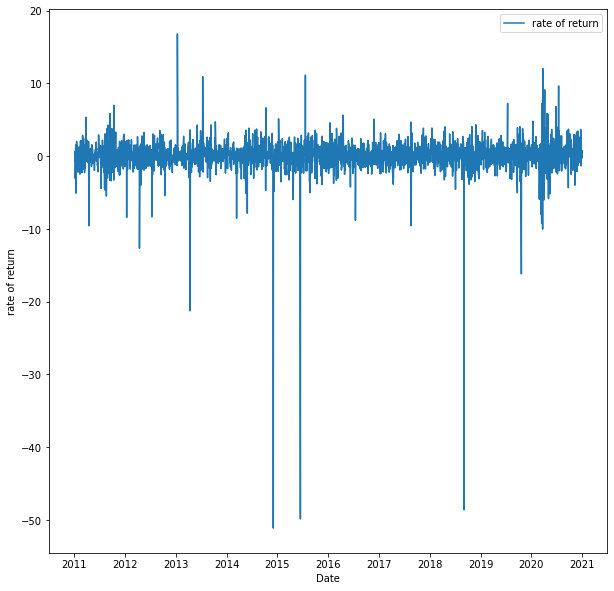

In [15]:
plt.figure(figsize=(10,10))
plt.plot(df,label="rate of return")
plt.xlabel('Date')
plt.ylabel('rate of return')
plt.legend()
plt.show()

In [16]:
df.index=pd.to_datetime(df.index)
df.info

<bound method DataFrame.info of               return
Date                
2011-01-03  0.453126
2011-01-04  0.667949
2011-01-05 -0.627612
2011-01-06  0.536189
2011-01-07 -3.087848
...              ...
2020-12-24 -1.356690
2020-12-28  0.343837
2020-12-29  0.806257
2020-12-30 -0.279933
2020-12-31  0.721848

[2478 rows x 1 columns]>

In [17]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2609, freq='B')

In [18]:
df=df.ffill(axis=0)

In [19]:
df.isnull().values.any()

False

In [20]:
df

,return
Date,
2011-01-03,0.453126
2011-01-04,0.667949
2011-01-05,-0.627612
2011-01-06,0.536189
2011-01-07,-3.087848
...,...
2020-12-25,-1.356690
2020-12-28,0.343837
2020-12-29,0.806257


In [21]:
train=df.iloc[:2250,0]
test=df.iloc[2250:,0]

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
Decomp_results=seasonal_decompose(df)

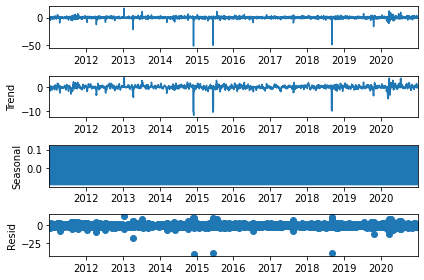

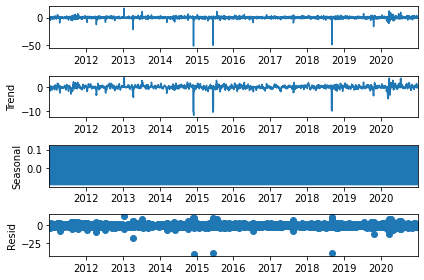

In [24]:
Decomp_results.plot()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

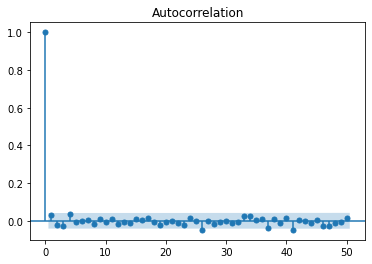

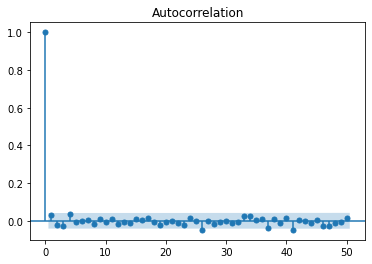

In [26]:
plot_acf(train,lags=50)

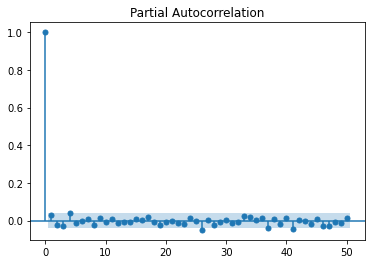

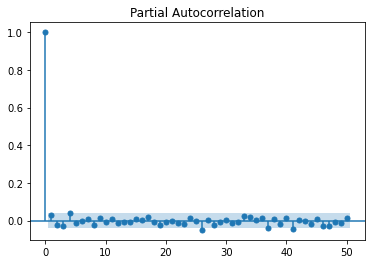

In [27]:
plot_pacf(train,lags=50)

In [28]:
from pmdarima import auto_arima

In [29]:
auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12141.350, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12136.059, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12137.019, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12137.013, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12134.124, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12139.010, Time=0.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.963 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.arima.ARIMA(train,order=(2,0,2))

pred=model.fit()

pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5228.448
Date:                Sat, 04 Jun 2022   AIC                          10468.897
Time:                        14:18:01   BIC                          10503.209
Sample:                    01-03-2011   HQIC                         10481.420
                         - 08-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0069      0.080     -0.086      0.932      -0.164       0.150
ar.L1         -0.6226      0.585     -1.064      0.287      -1.769       0.524
ar.L2         -0.6175      0.326     -1.897      0.058      -1.256       0.020
ma.L1          0.6647      0.585      1.135      0.256      -0.483       1.812
ma.L2          0.6244      0.338      1.848      0.065      -0.038       1.287
sigma2         6.1090      0.029    210.330      0.000       6.052       6.166
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):           4666865.13
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                           -11.12
Prob(H) (two-sided):                  0.00   Kurtosis:                       225.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred_results=pred.predict(start=start_len,end=end_len,typ='levels',dynamic=False)

print(pred_results)

2019-08-19   -0.093022
2019-08-20    0.010335
2019-08-21    0.035654
2019-08-22   -0.043937
2019-08-23   -0.010017
                ...   
2020-12-25   -0.006855
2020-12-28   -0.006855
2020-12-29   -0.006855
2020-12-30   -0.006855
2020-12-31   -0.006855
Freq: B, Name: predicted_mean, Length: 359, dtype: float64


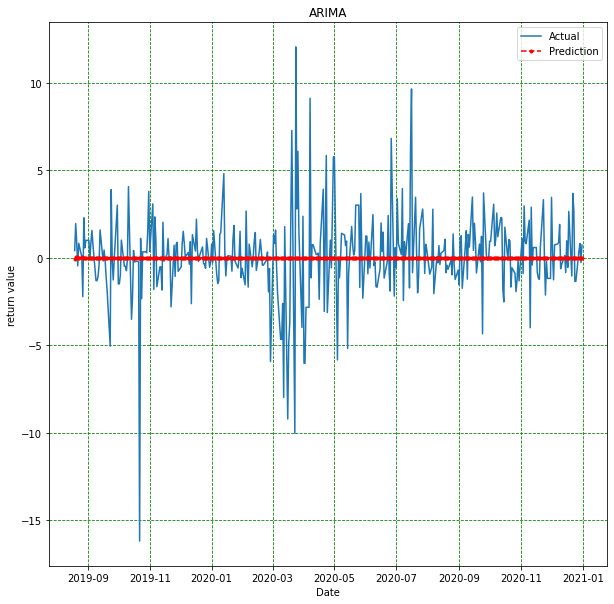

In [33]:
plt.figure(figsize=(10,10))
plt.plot(pred_results.index,test,label='Actual')
plt.plot(pred_results,label='Prediction',marker='.',linestyle='dashed',color='red')
plt.title('ARIMA')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [34]:
print('test mean')
test.mean()


test mean


0.13184251288001633

In [35]:
print('prediction mean')
pred_results.mean()

prediction mean


-0.007007149951232104

In [36]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred_results))
print(rmse)

2.471709490644166


In [37]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred_results)
print(error)

1.6020298969801368


In [38]:
from sklearn.metrics import r2_score
r2_score(test,pred_results)


-0.0031112754026443312